In [1]:
!pip list

Package                           Version
--------------------------------- --------------
anaconda-anon-usage               0.7.2
anaconda-auth                     0.8.6
anaconda-cli-base                 0.5.2
annotated-types                   0.6.0
anyio                             4.10.0
archspec                          0.2.3
argon2-cffi                       25.1.0
argon2-cffi-bindings              25.1.0
arrow                             1.3.0
asttokens                         3.0.0
async-lru                         2.0.5
attrs                             25.3.0
babel                             2.17.0
backports.tarfile                 0.0.0
beautifulsoup4                    4.13.5
bleach                            6.2.0
boltons                           25.0.0
brotlicffi                        1.0.9.2
cached-property                   1.5.2
catboost                          1.2.8
certifi                           2025.8.3
cffi                              1.17.1
charset-normaliz

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem




In [4]:
reference = pd.read_csv('top_desalted_inhibitors.smi', header=None, names=['smiles'])
reference

smiles
0                 CCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1ccccc1
1    CCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1
2                        CCc1nc(N)nc(N)c1-c1cccc(OC)c1
3                  Nc1ncc(Cc2ccc(OCc3ccccc3)cc2)c(N)n1
4     CCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1
..                                                 ...
106                   CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1
107                CCCc1nc(N)nc(N)c1N1CCN(c2ccccc2)CC1
108  CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...
109                      CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1
110      COc1ncc(-c2cccc(N3CCN(c4cnc(N)nc4N)CC3)c2)cn1

[111 rows x 1 columns]

In [5]:
reference['smiles'][10]

'NC1=NC(c2ccc(Oc3ccccc3)cc2)N(c2cccc(Cl)c2)C(N)=N1'

In [6]:
reference.isna().sum()

smiles    0
dtype: int64

In [7]:
# Reference actives list (as SMILES or RDKit Mol objects)
reference_smiles = reference.smiles
reference_mols = [Chem.MolFromSmiles(sm) for sm in reference_smiles]
reference_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in reference_mols]



[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerator
[11:59:22] DEPRECATION WARNING: please use MorganGenerat

In [8]:
prior = pd.read_csv('sampled_malaria_prior.csv')
finetuned = pd.read_csv('sampled_malaria.csv')

In [9]:
prior

SMILES    NLL
0     CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(...  32.33
1     O=S(=O)(c1ccccc1Cl)N(Cc1ccccc1)c1ccc(C(O)(C(F)...  25.18
2     Cc1ccc(Cc2c(-c3ccc(Cl)cc3Cl)nc3ccc(C(=O)O)cn23...  28.09
3                      c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1  22.41
4          COC(=O)c1cc(S(=O)(=O)NC(C)c2ccccc2)c(C)[nH]1  25.39
...                                                 ...    ...
9823                   CCCCN1CCn2cccc2C1c1ccnc(C(C)C)n1  33.85
9824  CN(C)S(=O)(=O)c1ccc(C(=O)NCc2nnc(SCC(=O)N3CCCC...  23.77
9825      Cc1ccccc1CN1CCc2c(C)c(C)c(O)c(C)c2C1Cc1ccccc1  33.40
9826           CCCCC(=O)C(CC)(CCc1ccncc1)C(=O)Cc1ccccc1  41.74
9827                    CCC1C(=O)NCCN1c1nc(=N)[nH][nH]1  24.74

[9828 rows x 2 columns]

In [10]:
def compute_max_similarity(smiles, reference_fps):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.nan
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    sims = DataStructs.BulkTanimotoSimilarity(fp, reference_fps)
    return max(sims) if sims else 0.0

# Apply to both dataframes
prior['similarity'] = prior['SMILES'].apply(lambda sm: compute_max_similarity(sm, reference_fps))
finetuned['similarity'] = finetuned['SMILES'].apply(lambda sm: compute_max_similarity(sm, reference_fps))


[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerator
[12:00:39] DEPRECATION WARNING: please use MorganGenerat

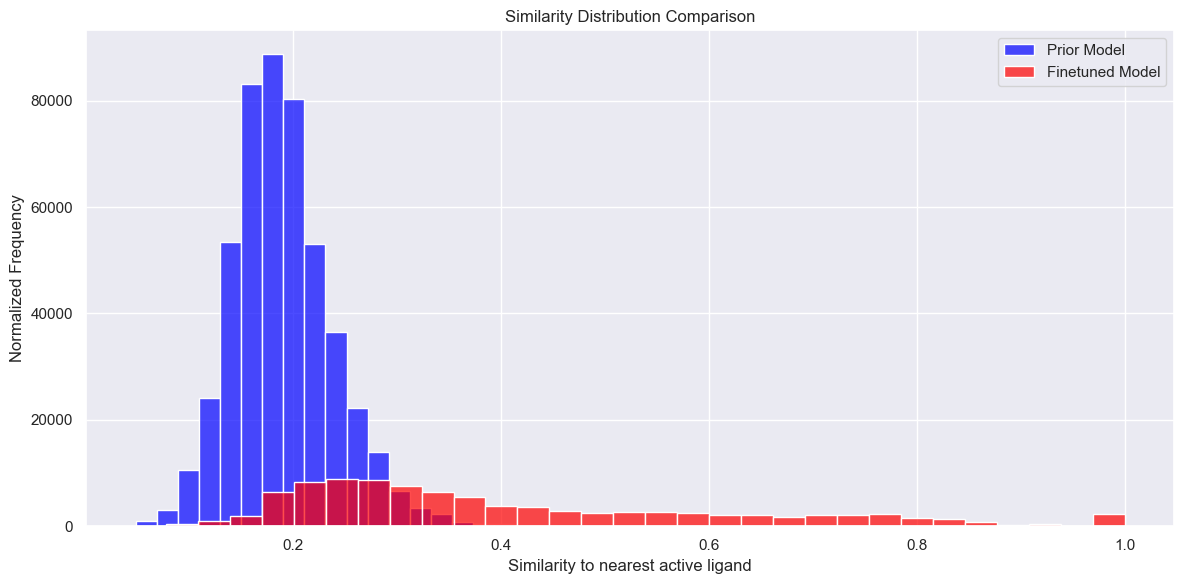

In [11]:

# Plot
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.histplot(prior['similarity'], bins=30, stat='frequency', color='blue', label='Prior Model', kde=False, alpha=0.7)
sns.histplot(finetuned['similarity'], bins=30, stat='frequency', color='red', label='Finetuned Model', kde=False, alpha=0.7)
plt.xlabel("Similarity to nearest active ligand")
plt.ylabel("Normalized Frequency")
plt.title("Similarity Distribution Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
Chem.MolFromSmiles('c1ccc2cccfcc2ccc1')

[12:01:10] SMILES Parse Error: syntax error while parsing: c1ccc2cccfcc2ccc1
[12:01:10] SMILES Parse Error: check for mistakes around position 10:
[12:01:10] c1ccc2cccfcc2ccc1
[12:01:10] ~~~~~~~~~^
[12:01:10] SMILES Parse Error: Failed parsing SMILES 'c1ccc2cccfcc2ccc1' for input: 'c1ccc2cccfcc2ccc1'


## validity, Novelty and Uniqueness

In [13]:
prior

SMILES    NLL  similarity
0     CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(...  32.33    0.173913
1     O=S(=O)(c1ccccc1Cl)N(Cc1ccccc1)c1ccc(C(O)(C(F)...  25.18    0.154762
2     Cc1ccc(Cc2c(-c3ccc(Cl)cc3Cl)nc3ccc(C(=O)O)cn23...  28.09    0.181818
3                      c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1  22.41    0.120000
4          COC(=O)c1cc(S(=O)(=O)NC(C)c2ccccc2)c(C)[nH]1  25.39    0.164384
...                                                 ...    ...         ...
9823                   CCCCN1CCn2cccc2C1c1ccnc(C(C)C)n1  33.85    0.183099
9824  CN(C)S(=O)(=O)c1ccc(C(=O)NCc2nnc(SCC(=O)N3CCCC...  23.77    0.189474
9825      Cc1ccccc1CN1CCc2c(C)c(C)c(O)c(C)c2C1Cc1ccccc1  33.40    0.205882
9826           CCCCC(=O)C(CC)(CCc1ccncc1)C(=O)Cc1ccccc1  41.74    0.266667
9827                    CCC1C(=O)NCCN1c1nc(=N)[nH][nH]1  24.74    0.140625

[9828 rows x 3 columns]

In [14]:
finetuned

SMILES    NLL  similarity
0                         CCc1nc(N)nc(N)c1-c1cccc(Cl)c1   4.85    1.000000
1     NC1=NC(c2ccc(Oc3ccccc3)cc2)N(c2ccc(Cl)cc2)C(N)=N1   4.75    1.000000
2                   CCCCCCCC1N=C(N)N=C(N)N1c1cccc(Cl)c1   4.86    1.000000
3           COc1cc(COc2ccc(Cc3cnc(N)nc3N)cc2)cc(OC)c1OC   4.90    1.000000
4                   COc1ccc(Cc2cnc(N)nc2N)cc1OCc1ccccc1   7.03    1.000000
...                                                 ...    ...         ...
2879   CCCCCCC(NC(=O)Cc1ccc(NC(=O)Nc2ccccc2C)cc1)C(N)=O  24.42    0.246914
2880                 c1ccc(CCNCCNC2(c3ccccc3)CCCCC2)cc1  19.61    0.203704
2881      N#Cc1ccc(Oc2cccc(NC(=O)Nc3cccc(Cl)c3)c2)cc1Cl  24.55    0.264706
2882            COc1cc(Cc2c(N)nc(N)nc2OC)ccc1OCc1ccccc1  10.68    0.795918
2883  CN(C)CCCOc1ccc(NC(=O)Nc2cccc(OCCc3ccc(Cl)cc3Cl...  20.44    0.246914

[2884 rows x 3 columns]

Text(0, 0.5, 'Max Similarity to Reference Actives')

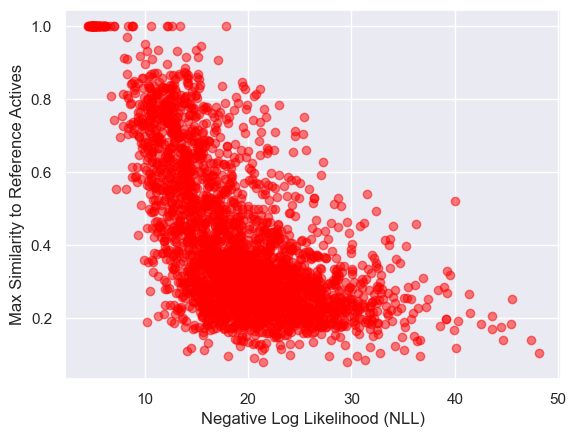

In [15]:
plt.scatter(finetuned.NLL, finetuned.similarity, label='Finetuned Model', color='red', alpha=0.5)
plt.xlabel("Negative Log Likelihood (NLL)")
plt.ylabel("Max Similarity to Reference Actives")

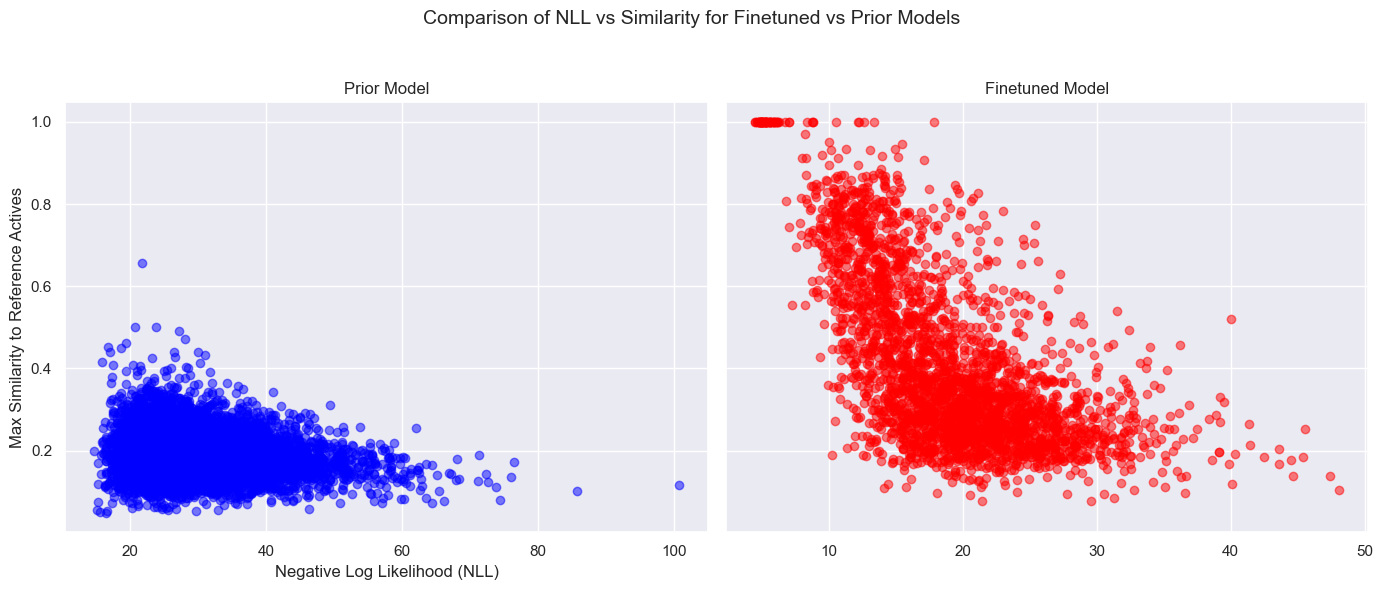

In [16]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Finetuned Model (Left)
axes[1].scatter(finetuned.NLL, finetuned.similarity, color='red', alpha=0.5)
axes[1].set_title("Finetuned Model")
axes[0].set_xlabel("Negative Log Likelihood (NLL)")
axes[0].set_ylabel("Max Similarity to Reference Actives")

# Plot for Prior Model (Right)
axes[0].scatter(prior.NLL, prior.similarity, color='blue', alpha=0.5)
axes[0].set_title("Prior Model")
axes[0].set_xlabel("Negative Log Likelihood (NLL)")
# No ylabel for consistency

plt.suptitle("Comparison of NLL vs Similarity for Finetuned vs Prior Models", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust to fit suptitle
plt.show()


In [17]:
from rdkit import Chem

def is_valid(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

prior['valid'] = prior['SMILES'].apply(is_valid)
valid_smiles = prior[prior['valid']]['SMILES'].tolist()


In [18]:
len(valid_smiles)

9828

In [19]:
len(valid_smiles) / len(prior) * 100

100.0

In [20]:
unique_smiles = set(valid_smiles)
num_unique = len(unique_smiles)
num_unique

9828

In [21]:
finetuned['valid'] = finetuned['SMILES'].apply(is_valid)
valid_smiles = finetuned[finetuned['valid']]['SMILES'].tolist()

In [22]:
len(valid_smiles)

2884

In [23]:
len(valid_smiles) / len(finetuned) * 100

100.0

In [24]:
unique_smiles = set(valid_smiles)
num_unique = len(unique_smiles)
num_unique

2884

In [25]:
reference_smiles_set = set(reference['smiles'])  # your training or known dataset
novel_smiles = [s for s in unique_smiles if s not in reference_smiles_set]
num_novel = len(novel_smiles)


In [26]:
num_novel


2820

In [27]:
len(novel_smiles) / len(unique_smiles) * 100

97.78085991678225

## Murcko scaffold


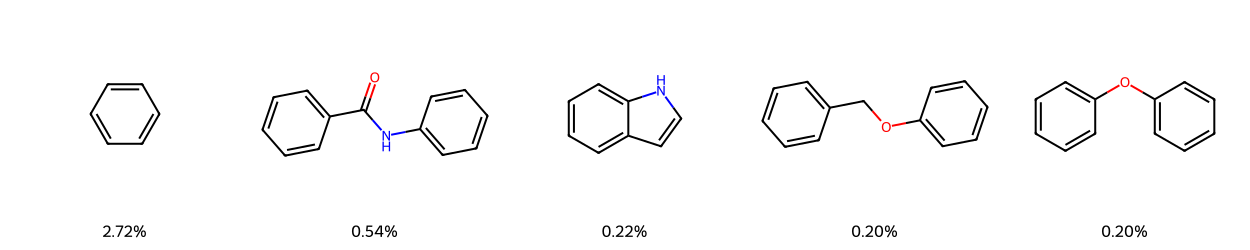

In [28]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw

# Step 1: Get Murcko scaffold from SMILES
def get_bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

# Step 2: Generate scaffold column
prior['scaffold'] = prior['SMILES'].apply(get_bemis_murcko_scaffold)

# Step 3: Calculate scaffold frequencies
scaffold_counts = prior['scaffold'].value_counts()
top_scaffolds = scaffold_counts.head(6)
total_scaffolds = scaffold_counts.sum()

# Step 4: Convert to RDKit Mol objects
mol_list = [
    Chem.MolFromSmiles(smi)
    for smi in top_scaffolds.index
    if smi and smi.strip() != "" and Chem.MolFromSmiles(smi) is not None
]

# Step 5: Create legends with percentage
legends = [
    f"{(count / total_scaffolds * 100):.2f}%"
    for count in top_scaffolds.values
]

# Step 6: Visualize in 5 x 2 grid
img = Draw.MolsToGridImage(
    mol_list,
    molsPerRow=5,
    subImgSize=(250, 250),
    legends=legends
)
img

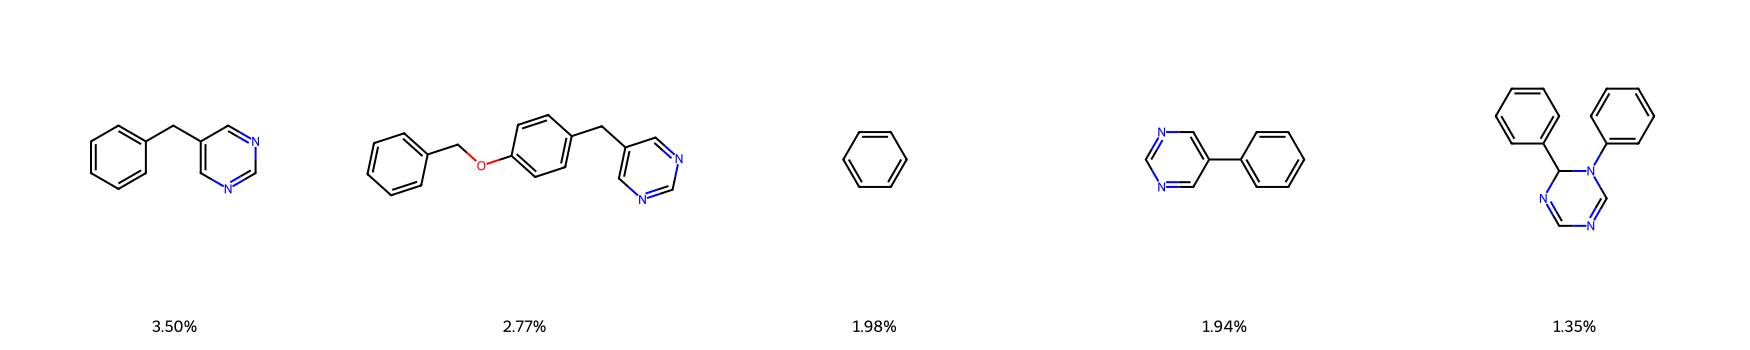

In [29]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw

# Step 1: Get Murcko scaffold from SMILES
def get_bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

# Step 2: Generate scaffold column
finetuned['scaffold'] = finetuned['SMILES'].apply(get_bemis_murcko_scaffold)

# Step 3: Calculate scaffold frequencies
scaffold_counts = finetuned['scaffold'].value_counts()
top_scaffolds = scaffold_counts.head(5)
total_scaffolds = scaffold_counts.sum()

# Step 4: Convert to RDKit Mol objects
mol_list = [
    Chem.MolFromSmiles(smi)
    for smi in top_scaffolds.index
    if smi and smi.strip() != "" and Chem.MolFromSmiles(smi) is not None
]

# Step 5: Create legends with percentage
legends = [
    f"{(count / total_scaffolds * 100):.2f}%"
    for count in top_scaffolds.values
]

# Step 6: Visualize in 5 x 2 grid
img = Draw.MolsToGridImage(
    mol_list,
    molsPerRow=5,
    subImgSize=(350, 350),
    legends=legends,

)
img

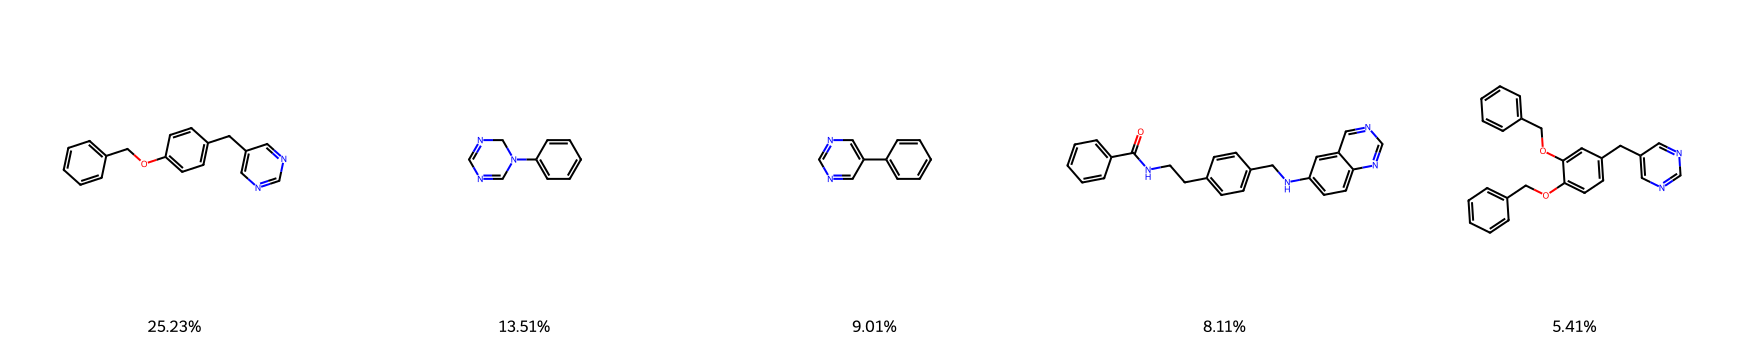

In [31]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw

# Step 1: Get Murcko scaffold from SMILES
def get_bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

# Step 2: Generate scaffold column
reference['scaffold'] = reference['smiles'].apply(get_bemis_murcko_scaffold)

# Step 3: Calculate scaffold frequencies
scaffold_counts = reference['scaffold'].value_counts()
top_scaffolds = scaffold_counts.head(5)
total_scaffolds = scaffold_counts.sum()

# Step 4: Convert to RDKit Mol objects
mol_list = [
    Chem.MolFromSmiles(smi)
    for smi in top_scaffolds.index
    if smi and smi.strip() != "" and Chem.MolFromSmiles(smi) is not None
]

# Step 5: Create legends with percentage
legends = [
    f"{(count / total_scaffolds * 100):.2f}%"
    for count in top_scaffolds.values
]

# Step 6: Visualize in 5 x 2 grid
img = Draw.MolsToGridImage(
    mol_list,
    molsPerRow=5,
    subImgSize=(350, 350),
    legends=legends,

)
img

## scatter plot, histogram of QED, SAscore, logP, and three other descriptors

In [32]:
prior['label'] = 'Prior'

In [33]:
finetuned['label'] = 'Finetuned'

In [34]:
reference['label'] = 'ChembL'

In [35]:
reference.rename(columns={'smiles': 'SMILES'}, inplace=True)

In [36]:
combined = pd.concat([prior, finetuned, reference], ignore_index=True)

In [37]:
combined

SMILES    NLL  similarity  \
0      CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(...  32.33    0.173913   
1      O=S(=O)(c1ccccc1Cl)N(Cc1ccccc1)c1ccc(C(O)(C(F)...  25.18    0.154762   
2      Cc1ccc(Cc2c(-c3ccc(Cl)cc3Cl)nc3ccc(C(=O)O)cn23...  28.09    0.181818   
3                       c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1  22.41    0.120000   
4           COC(=O)c1cc(S(=O)(=O)NC(C)c2ccccc2)c(C)[nH]1  25.39    0.164384   
...                                                  ...    ...         ...   
12818                   CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1    NaN         NaN   
12819                CCCc1nc(N)nc(N)c1N1CCN(c2ccccc2)CC1    NaN         NaN   
12820  CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...    NaN         NaN   
12821                      CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1    NaN         NaN   
12822      COc1ncc(-c2cccc(N3CCN(c4cnc(N)nc4N)CC3)c2)cn1    NaN         NaN   

      valid                                 scaffold   label  
0      True                         c1ccc2[nH]ccc2c1   Prior  
1      True    O=S(=O)(c1ccccc1)N(Cc1ccccc1)c1ccccc1   Prior  
2      True      c1ccc(Cc2c(-c3ccccc3)nc3ccccn23)cc1   Prior  
3      True         c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1   Prior  
4      True            O=S(=O)(NCc1ccccc1)c1cc[nH]c1   Prior  
...     ...                                      ...     ...  
12818   NaN                       C1=NC=NCN1c1ccccc1  ChembL  
12819   NaN             c1ccc(N2CCN(c3cncnc3)CC2)cc1  ChembL  
12820   NaN               c1ccc(NCc2cnc3ncncc3n2)cc1  ChembL  
12821   NaN                      c1ccc(-c2cncnc2)cc1  ChembL  
12822   NaN  c1cc(-c2cncnc2)cc(N2CCN(c3cncnc3)CC2)c1  ChembL  

[12823 rows x 6 columns]

In [59]:
from rdkit.Chem.QED import qed

In [60]:
combined['SMILES'][0]

'CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(=O)O'

In [61]:
qed(Chem.MolFromSmiles(combined['SMILES'][0]))

0.39787564537046133

In [62]:
combined['qed'] = combined['SMILES'].apply(lambda sm:qed(Chem.MolFromSmiles(sm)) if Chem.MolFromSmiles(sm) else np.nan)

In [63]:
from rdkit.Contrib.SA_Score import sascorer


In [44]:
combined['sascore'] =  combined['SMILES'].apply(lambda sm: sascorer.calculateScore(Chem.MolFromSmiles(sm)) if Chem.MolFromSmiles(sm) else np.nan)

In [64]:
combined

SMILES    NLL  similarity  \
0      CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(...  32.33    0.173913   
1      O=S(=O)(c1ccccc1Cl)N(Cc1ccccc1)c1ccc(C(O)(C(F)...  25.18    0.154762   
2      Cc1ccc(Cc2c(-c3ccc(Cl)cc3Cl)nc3ccc(C(=O)O)cn23...  28.09    0.181818   
3                       c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1  22.41    0.120000   
4           COC(=O)c1cc(S(=O)(=O)NC(C)c2ccccc2)c(C)[nH]1  25.39    0.164384   
...                                                  ...    ...         ...   
12818                   CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1    NaN         NaN   
12819                CCCc1nc(N)nc(N)c1N1CCN(c2ccccc2)CC1    NaN         NaN   
12820  CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...    NaN         NaN   
12821                      CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1    NaN         NaN   
12822      COc1ncc(-c2cccc(N3CCN(c4cnc(N)nc4N)CC3)c2)cn1    NaN         NaN   

      valid                                 scaffold   label       qed  \
0      True                         c1ccc2[nH]ccc2c1   Prior  0.397876   
1      True    O=S(=O)(c1ccccc1)N(Cc1ccccc1)c1ccccc1   Prior  0.400342   
2      True      c1ccc(Cc2c(-c3ccccc3)nc3ccccn23)cc1   Prior  0.454617   
3      True         c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1   Prior  0.850070   
4      True            O=S(=O)(NCc1ccccc1)c1cc[nH]c1   Prior  0.825636   
...     ...                                      ...     ...       ...   
12818   NaN                       C1=NC=NCN1c1ccccc1  ChembL  0.794303   
12819   NaN             c1ccc(N2CCN(c3cncnc3)CC2)cc1  ChembL  0.897072   
12820   NaN               c1ccc(NCc2cnc3ncncc3n2)cc1  ChembL  0.294720   
12821   NaN                      c1ccc(-c2cncnc2)cc1  ChembL  0.856137   
12822   NaN  c1cc(-c2cncnc2)cc(N2CCN(c3cncnc3)CC2)c1  ChembL  0.694500   

        sascore     logp    MolWt  
0      3.041186  1.75880  389.452  
1      2.480756  6.04770  523.882  
2      2.304056  5.90552  411.288  
3      2.747511  1.74360  271.368  
4      2.805642  2.14922  322.386  
...         ...      ...      ...  
12818  2.566058  1.52550  251.721  
12819  2.331125  1.92010  312.421  
12820  3.086556  0.26840  454.447  
12821  2.123367  2.52380  248.717  
12822  2.565175  1.43320  378.440  

[12823 rows x 10 columns]

In [65]:
combined['logp']= combined['SMILES'].apply(lambda sm: Chem.Crippen.MolLogP(Chem.MolFromSmiles(sm)) if Chem.MolFromSmiles(sm) else np.nan)

In [66]:
from rdkit.Chem.Descriptors import MolWt

In [67]:
combined['MolWt'] = combined['SMILES'].apply(lambda sm: MolWt(Chem.MolFromSmiles(sm)) if Chem.MolFromSmiles(sm) else np.nan)

In [68]:
columns = [['qed', 'sascore'],
['logp', 'logp' ]]

color = ['Blue', 'Red', "Green"]


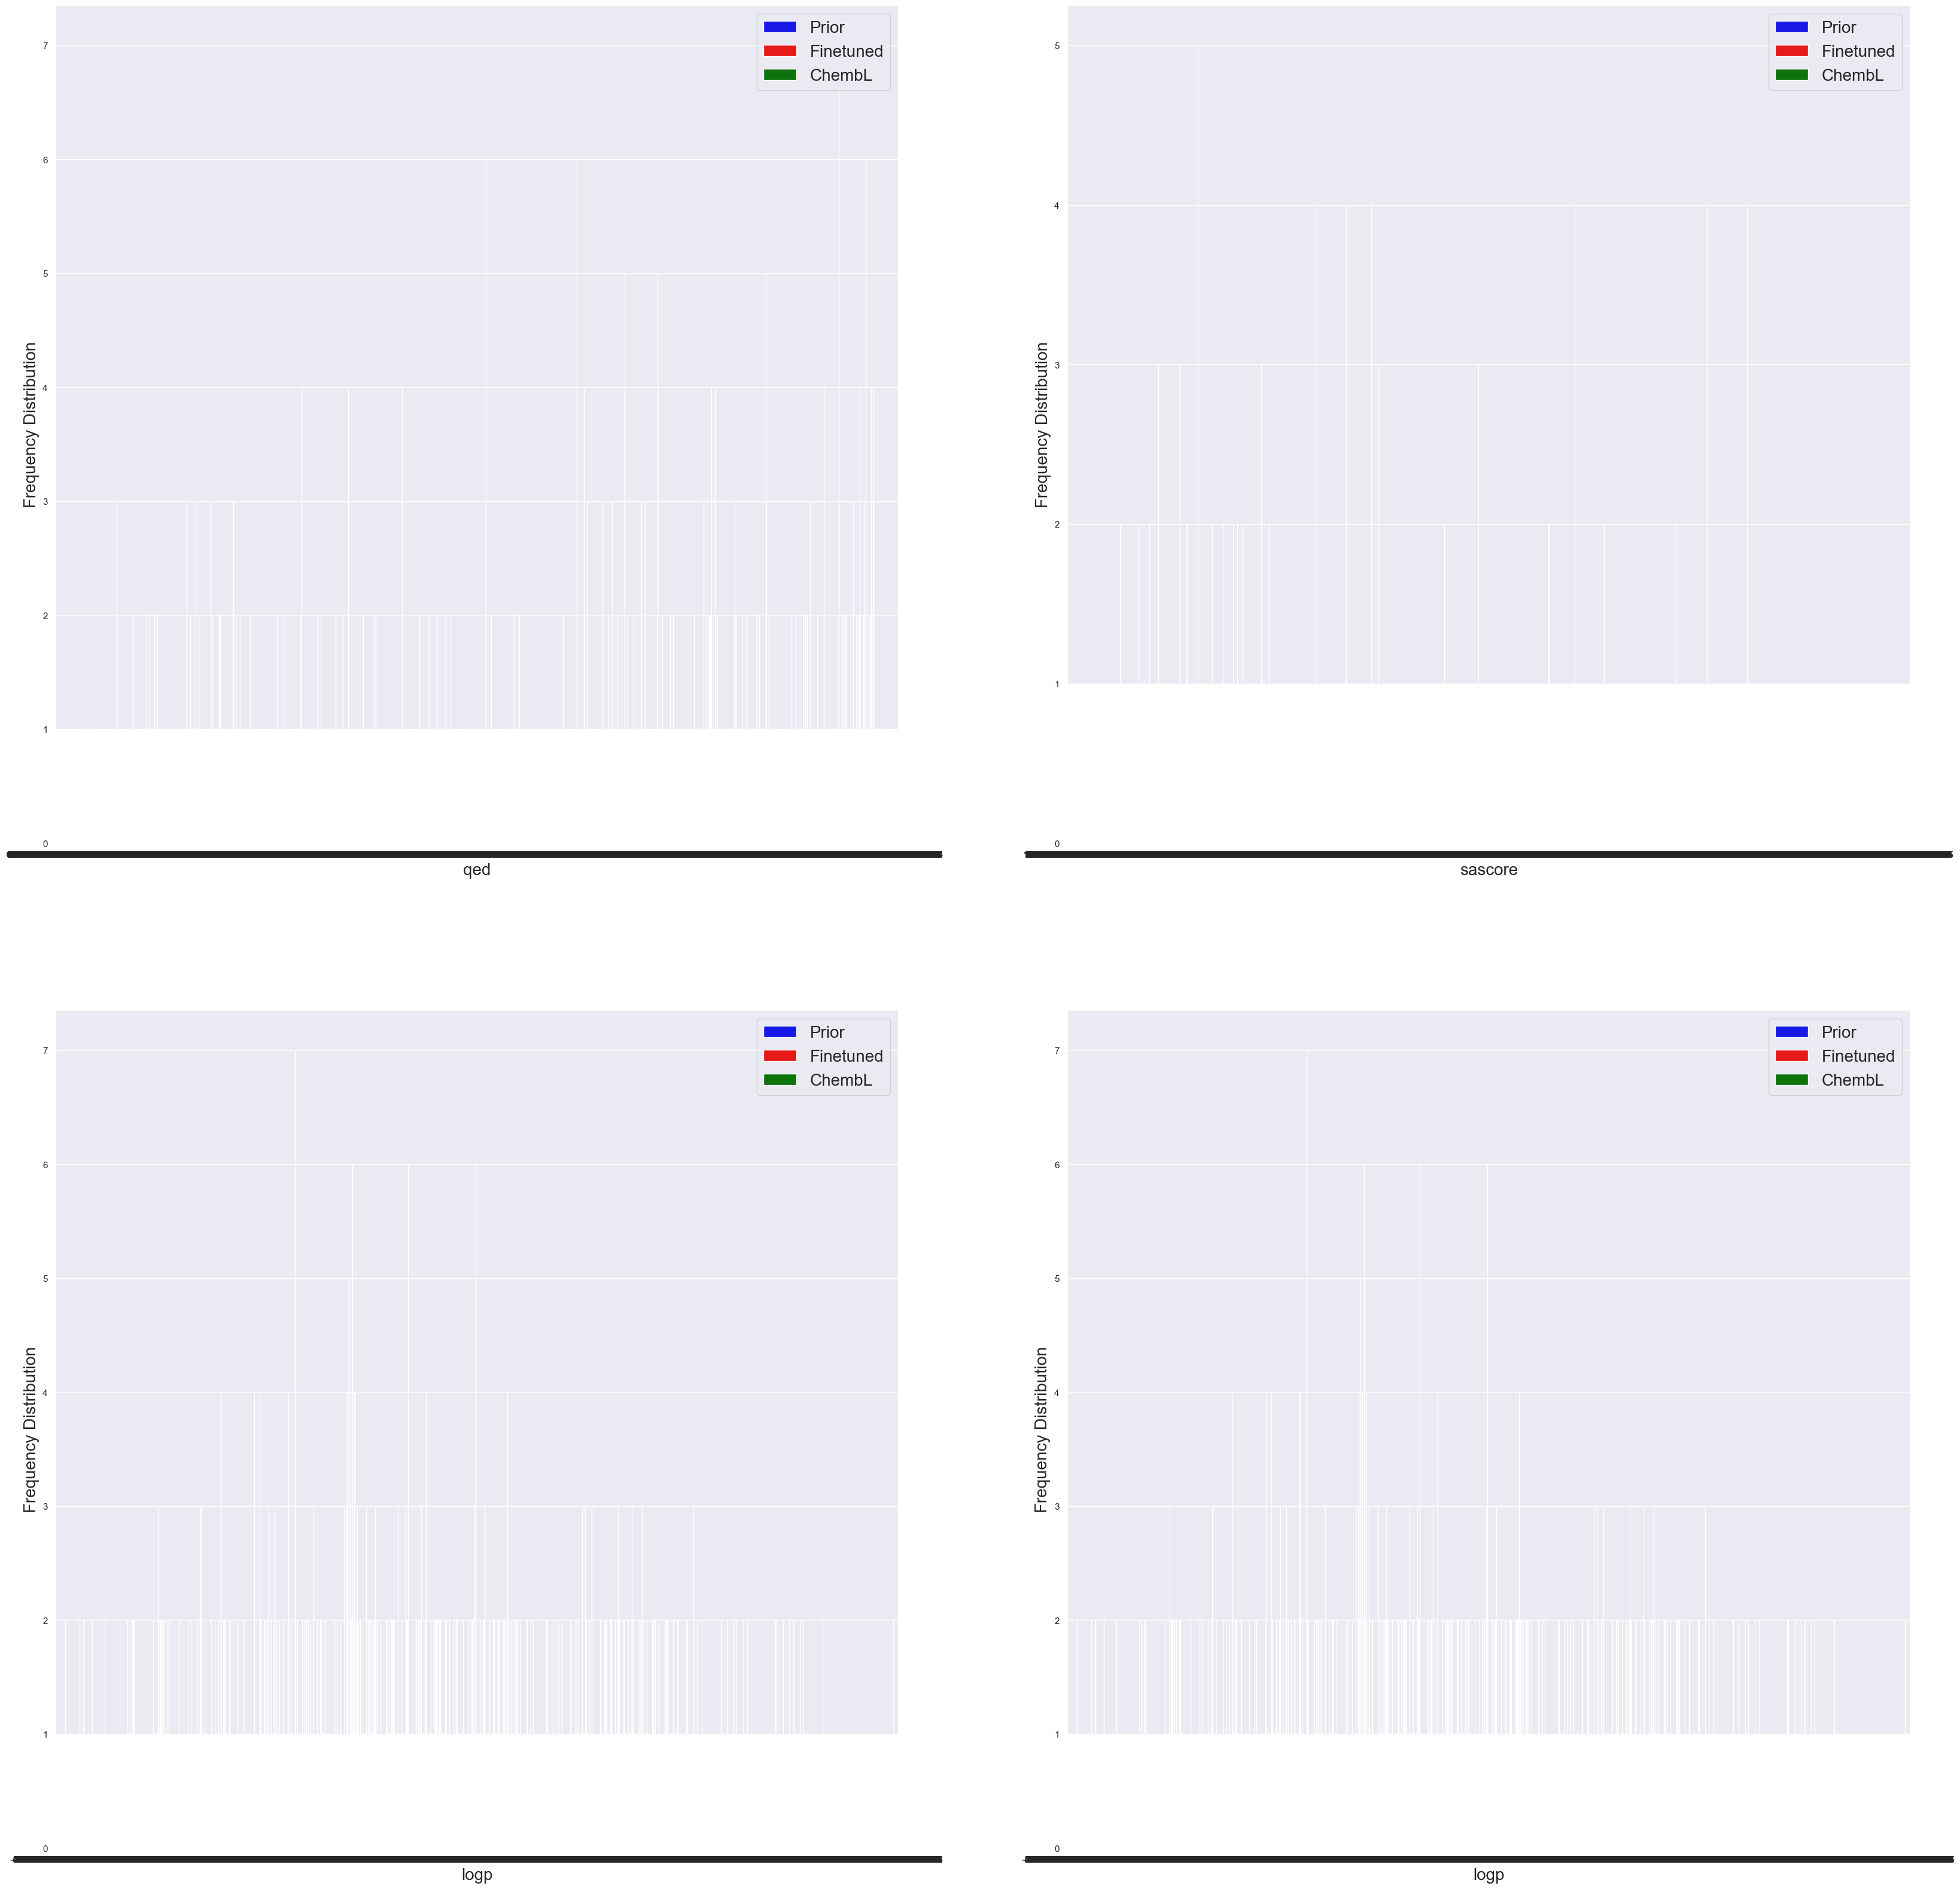

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(40, 40))


subgroup_order = ['Prior', 'Finetuned', 'ChembL']
for r in range(2):
    for c in range(2):
        sns.countplot(ax=axes[r, c], x = combined[columns[r][c]], hue=combined['label'], saturation=0.8, palette=color, hue_order= subgroup_order)
        #axes[r, c].rc('font', {'font.size': 20})
        axes[r, c].legend(loc='upper right', fontsize = 20.0)
        axes[r, c].set_ylabel('Frequency Distribution', fontsize = 20.0)
        axes[r, c].set_xlabel(columns[r][c], fontsize = 20.0)
        
plt.rcParams.update({'font.size': 30})
#fig.savefig('Structural_descriptors_eda.png')
plt.show()

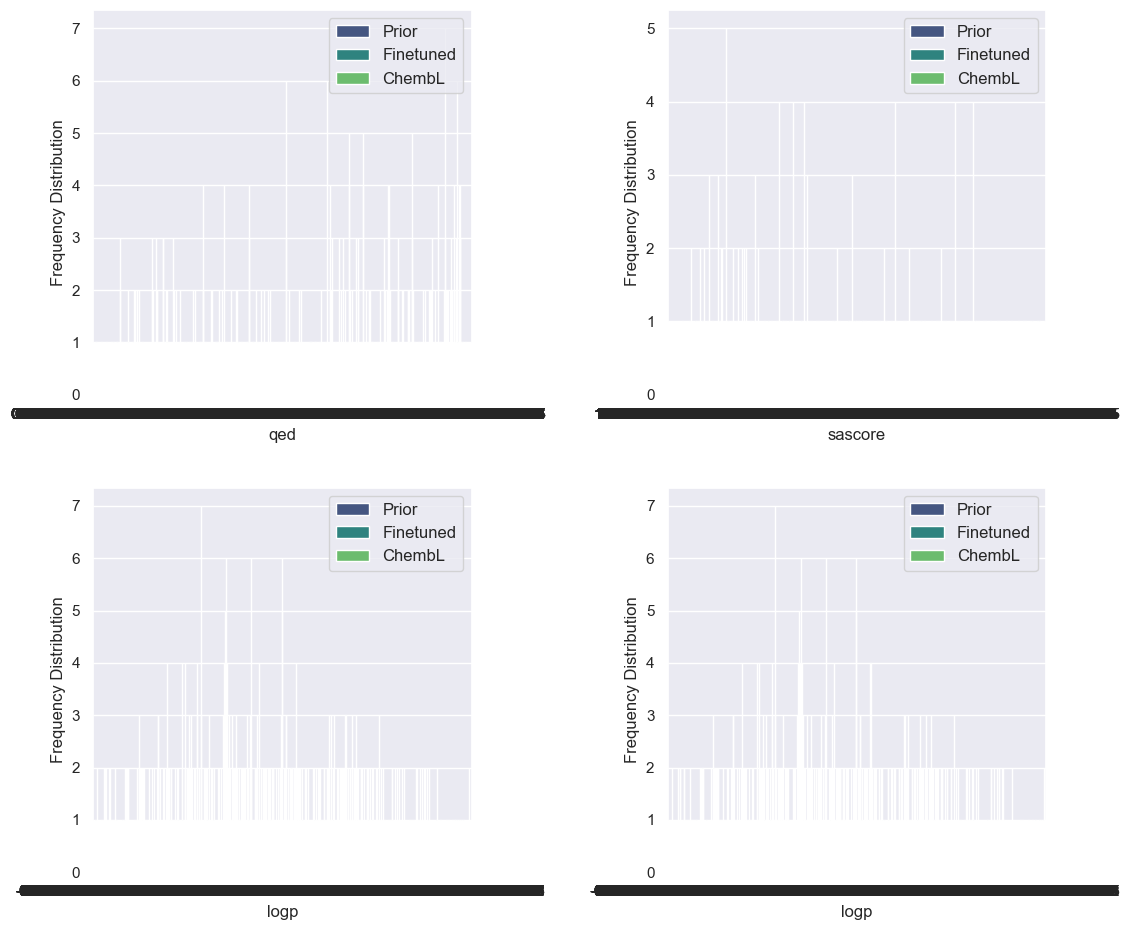

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

subgroup_order = ['Prior', 'Finetuned', 'ChembL']

for r in range(2):
    for c in range(2):
        sns.countplot(
            ax=axes[r, c],
            x=combined[columns[r][c]],
            hue=combined['label'],
            palette='viridis',
            hue_order=subgroup_order
        )
        axes[r, c].legend(loc='upper right', fontsize=12)
        axes[r, c].set_ylabel('Frequency Distribution', fontsize=12)
        axes[r, c].set_xlabel(columns[r][c], fontsize=12)

plt.tight_layout()
plt.show()


In [52]:
combined

SMILES    NLL  similarity  \
0      CC(C)CCNC(=O)C(CC(=O)O)NC(Cc1c[nH]c2ccccc12)C(...  32.33    0.173913   
1      O=S(=O)(c1ccccc1Cl)N(Cc1ccccc1)c1ccc(C(O)(C(F)...  25.18    0.154762   
2      Cc1ccc(Cc2c(-c3ccc(Cl)cc3Cl)nc3ccc(C(=O)O)cn23...  28.09    0.181818   
3                       c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1  22.41    0.120000   
4           COC(=O)c1cc(S(=O)(=O)NC(C)c2ccccc2)c(C)[nH]1  25.39    0.164384   
...                                                  ...    ...         ...   
12818                   CC1(C)N=C(N)N=C(N)N1c1ccc(Cl)cc1    NaN         NaN   
12819                CCCc1nc(N)nc(N)c1N1CCN(c2ccccc2)CC1    NaN         NaN   
12820  CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CC...    NaN         NaN   
12821                      CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1    NaN         NaN   
12822      COc1ncc(-c2cccc(N3CCN(c4cnc(N)nc4N)CC3)c2)cn1    NaN         NaN   

      valid                                 scaffold   label       qed  \
0      True                         c1ccc2[nH]ccc2c1   Prior  0.397876   
1      True    O=S(=O)(c1ccccc1)N(Cc1ccccc1)c1ccccc1   Prior  0.400342   
2      True      c1ccc(Cc2c(-c3ccccc3)nc3ccccn23)cc1   Prior  0.454617   
3      True         c1ccn(Cc2nnc3n2CCCN(CC2CC2)C3)c1   Prior  0.850070   
4      True            O=S(=O)(NCc1ccccc1)c1cc[nH]c1   Prior  0.825636   
...     ...                                      ...     ...       ...   
12818   NaN                       C1=NC=NCN1c1ccccc1  ChembL  0.794303   
12819   NaN             c1ccc(N2CCN(c3cncnc3)CC2)cc1  ChembL  0.897072   
12820   NaN               c1ccc(NCc2cnc3ncncc3n2)cc1  ChembL  0.294720   
12821   NaN                      c1ccc(-c2cncnc2)cc1  ChembL  0.856137   
12822   NaN  c1cc(-c2cncnc2)cc(N2CCN(c3cncnc3)CC2)c1  ChembL  0.694500   

        sascore     logp    MolWt  
0      3.041186  1.75880  389.452  
1      2.480756  6.04770  523.882  
2      2.304056  5.90552  411.288  
3      2.747511  1.74360  271.368  
4      2.805642  2.14922  322.386  
...         ...      ...      ...  
12818  2.566058  1.52550  251.721  
12819  2.331125  1.92010  312.421  
12820  3.086556  0.26840  454.447  
12821  2.123367  2.52380  248.717  
12822  2.565175  1.43320  378.440  

[12823 rows x 10 columns]

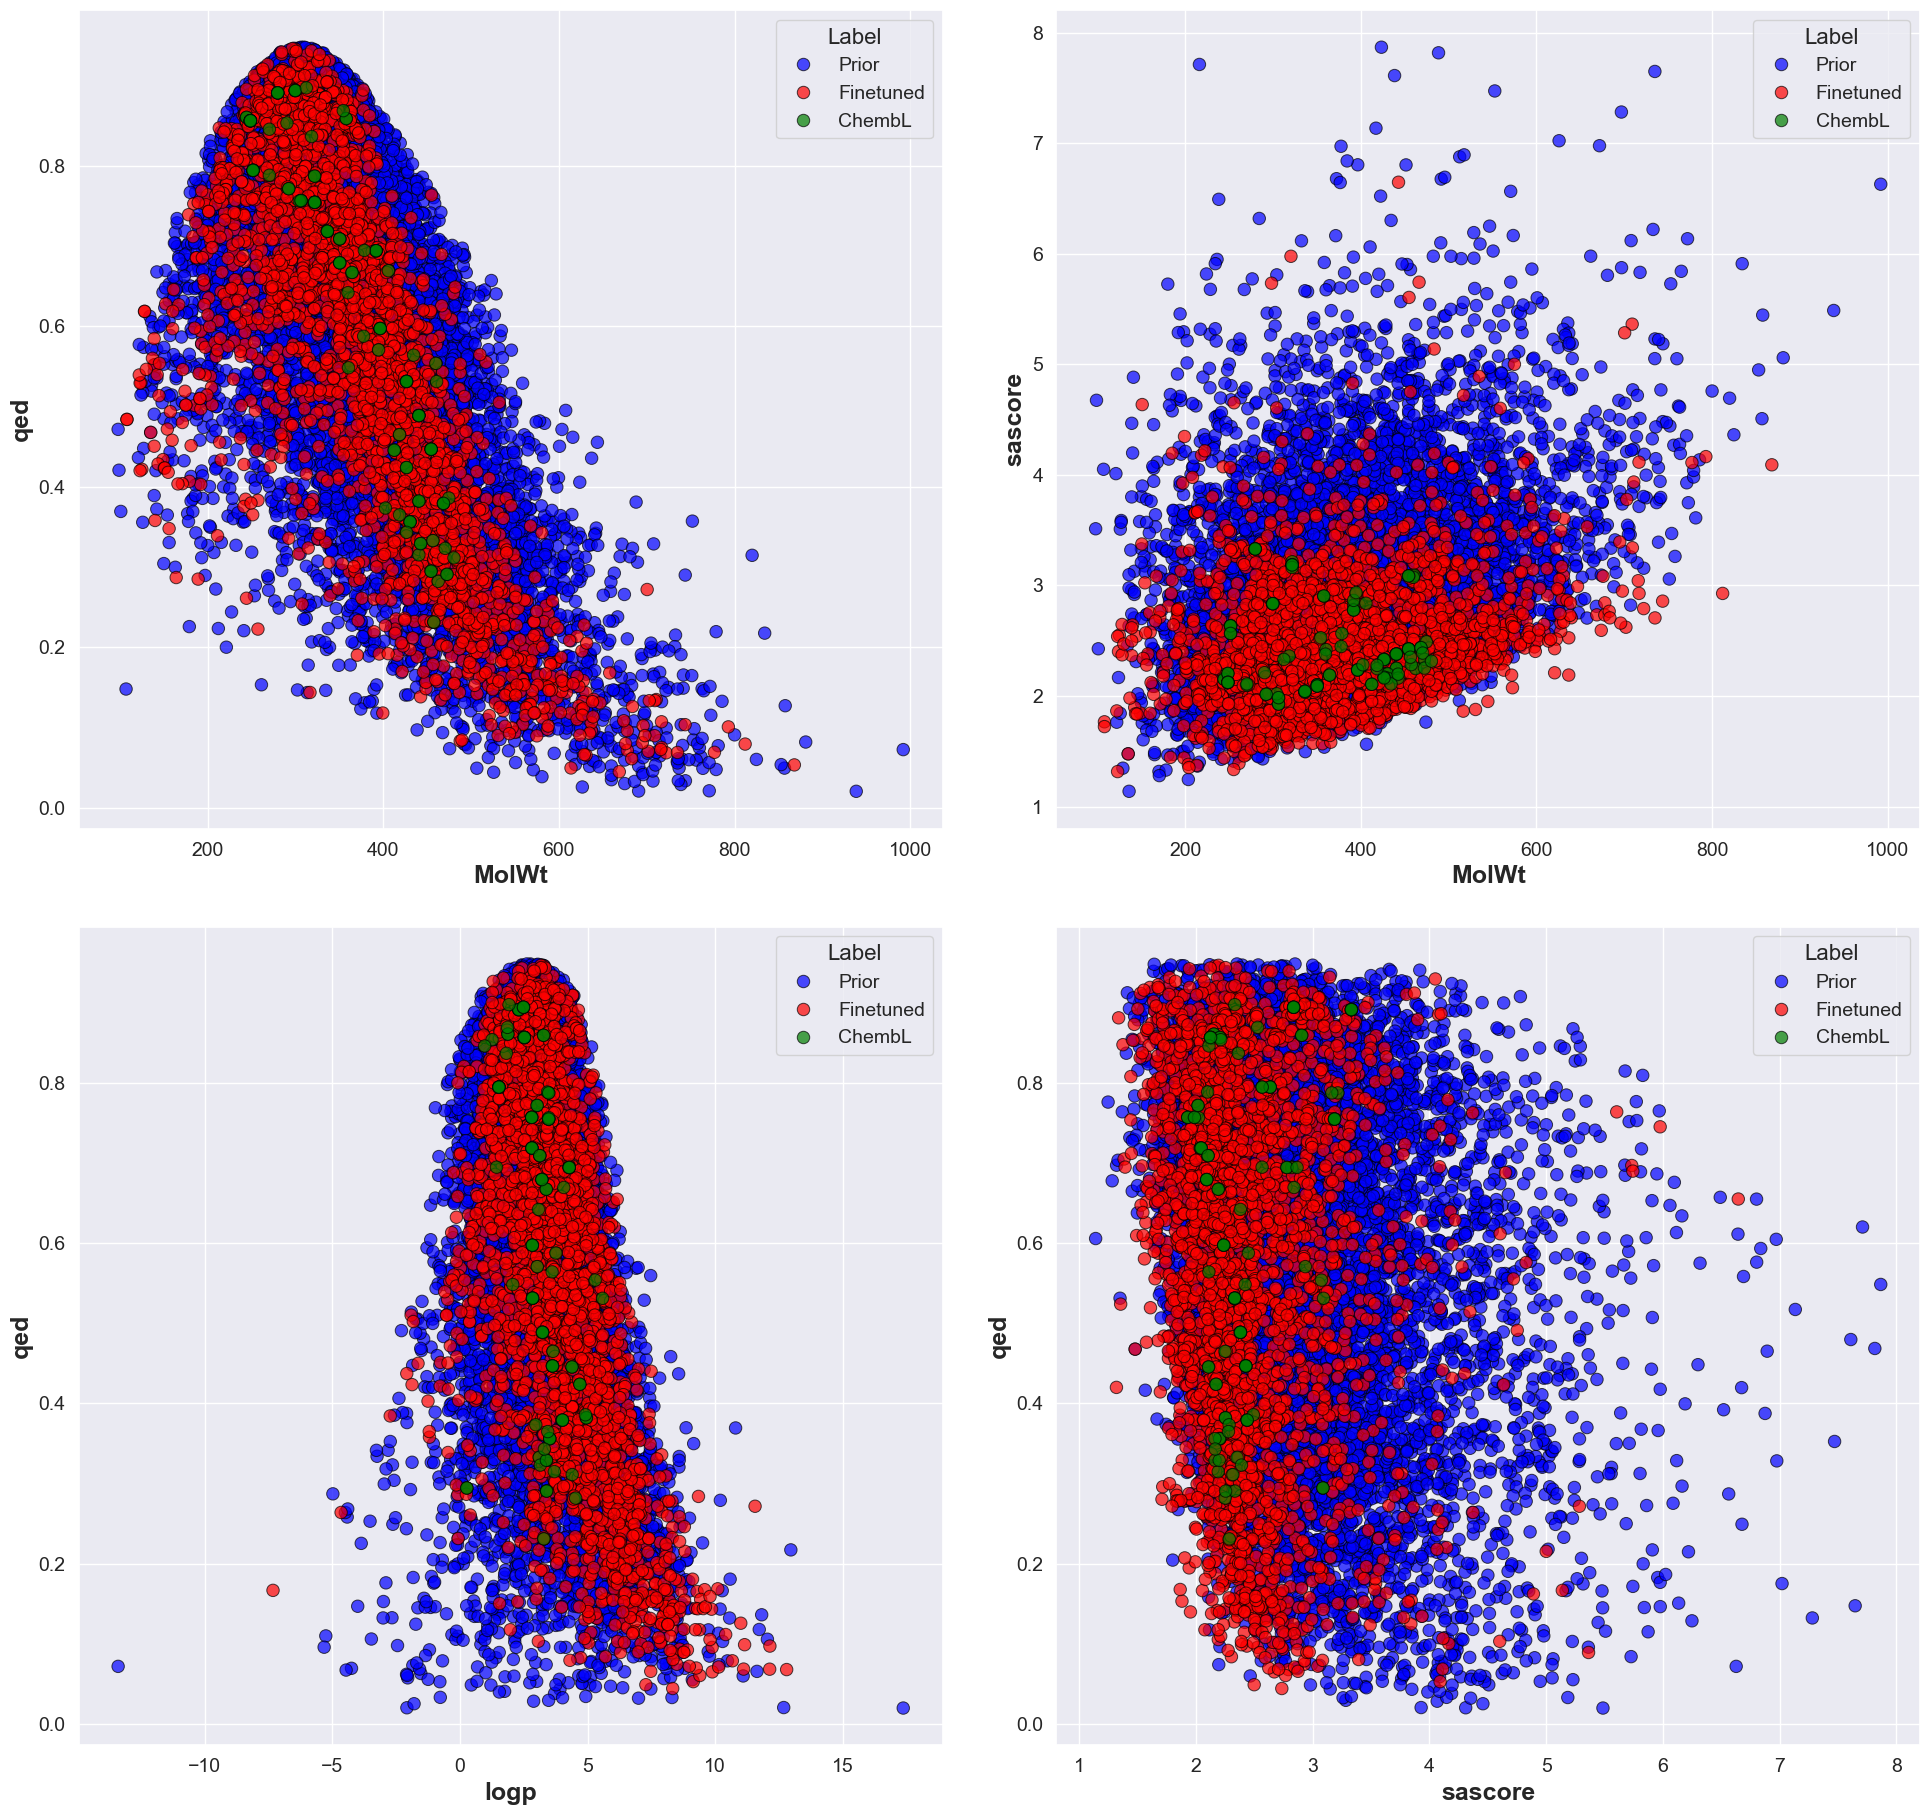

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your descriptor pairs to plot
columns = [
    ['MolWt', 'MolWt'],      # Row 1: X-axes
    ['logp', 'sascore']      # Row 2: X-axes
]
y_columns = [
    ['qed', 'sascore'],      # Row 1: Y-axes
    ['qed', 'qed']           # Row 2: Y-axes
]

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Adjust size as needed

# Order of subgroups in the legend
subgroup_order = ['Prior', 'Finetuned', 'ChembL']

# Custom color palette (optional)
palette = "prism"

# Loop through subplot grid and plot
for r in range(2):
    for c in range(2):
        x = columns[r][c]
        y = y_columns[r][c]
        sns.scatterplot(
            ax=axes[r, c],
            data=combined,
            x=x,
            y=y,
            hue='label',
            hue_order=subgroup_order,
            palette=color,
            edgecolor='black',
            alpha=0.7,
            s=80
        )
        axes[r, c].set_xlabel(x, fontsize=18, fontweight='bold')
        axes[r, c].set_ylabel(y, fontsize=18, fontweight='bold')
        axes[r, c].tick_params(axis='both', labelsize=14)
        axes[r, c].legend(title='Label', loc='upper right', fontsize=14, title_fontsize=16)

# Adjust layout and overall font
plt.tight_layout()
plt.subplots_adjust(top=0.92)


# Save to file (optional)
# fig.savefig("descriptor_scatter_grid.png", bbox_inches='tight', dpi=300)

plt.show()
